> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Overview**: For this project, the dataset I have used is: TMDb movies dataset.
The dataset contains large data of movies with the basic information of Genres, Cast , Director, Release date etc. and, has the financial information about Budget and Revenues. Based on these factors, the success and popularity of the movies are determined.

> **Questions to answer are:**
1. Top 10 Movies by Rating.
2. Movies with most and least profit.
3. Movies with biggest and lowest budget.
4. Movies with longest, shortest and average runtime.
5. Total Profits earned by the movies in their respectable Year of release.
6. The most popular produced genres.
7. The no. of films produced over time.

In [80]:
# Use this cell to set up import statements for all of the packages that you plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
% env
import csv
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [81]:
# Load your data and print out a few lines. Perform operations to inspect data
#  types and look for instances of missing or possibly errant data.

#Loading the dataset and storing it in df_tmdb
df = pd.read_csv('tmdb-movies.csv')

#checking the values of the data
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [82]:
#checking the no.of entries, column names snd their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> The above output shows that there are many columns with null values and also the datatypes of several columns needs to be modified for further analysis.

### Data Cleaning (Replace this with more specific notes!)

> **Removing Unnecessary Columns**: 
> Columns that are deleted are: imdb_id, popularity, homepage, keywords, overview, production_companies, budget_adj, revenue_adj

In [83]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#creating a list of columns to be deleted
del_col=[ 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'production_companies', 
         'budget_adj', 'revenue_adj']

#deleting the columns
df = df.drop(del_col,1)

#previewing the new dataset
df.head()


,id,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


> **Removing Duplication**: 
> Checking for duplicates and removing it, if found any.

In [84]:
#Checking the number of duplicates
df.duplicated().sum()

1

In [85]:
#Dropping the duplicates 
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

In [86]:
#Checking if the drop duplicates was successful
df.duplicated().sum()

0

> The duplicates has been dropped now, so there is no duplicate values in the dataset.


>**Removing rows having 0's or NaN value from Budget and Revenue columns**: 
> Checking for 0's or Null values in the dataset.

In [87]:
# creating a temp_list of revenue and budget columns
temp_list=['budget', 'revenue']

#Replacing all the value from '0' to NAN
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

In [88]:
#Printing the entries after dropping NAN values
rows, col = df.shape
print('The total no.of movies are {}.'.format(rows-1))

The total no.of movies are 3853.


In [89]:
# Checking the datatypes 
df.dtypes

id                  int64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

>**Changing the datatype of release_date to standard date format**:

In [90]:
#Changing the datatype of release_date to standard date format
df.release_date = pd.to_datetime(df['release_date'])

In [91]:
#Checking if the datatype change was successfull 
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [92]:
# save the modified data to 'edited_tmdb_movies.csv'
df.to_csv('edited_tmdb_movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Top 10 Movies by Rating.

> **Extracting data from edited dataset and printing Top 10 Movies**

In [93]:
#Loading the edited dataset and storing it in df_1
df_1 = pd.read_csv('edited_tmdb_movies.csv')

#List of the top 10 movies
df_top10 = df_1.nlargest(10,'vote_average')

df_top10.head()

,id,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
1427,278,25000000.0,28341469.0,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,142,Drama|Crime,1994-09-10,5754,8.4,1994
2805,24128,1200000.0,4978922.0,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,Why stop making sense? Why a movie? Why a big ...,88,Documentary|Music,1984-11-16,23,8.4,1984
2557,238,6000000.0,245066411.0,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,An offer you can't refuse.,175,Drama|Crime,1972-03-15,3970,8.3,1972
181,244786,3300000.0,13993093.0,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,The road to greatness can take you to the edge.,105,Drama|Music,2014-10-10,2372,8.2,2014
696,550,63000000.0,100853753.0,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,How much can you know about yourself if you've...,139,Drama,1999-10-14,5923,8.1,1999


> **Plotting Top 10 Movies by Rating**

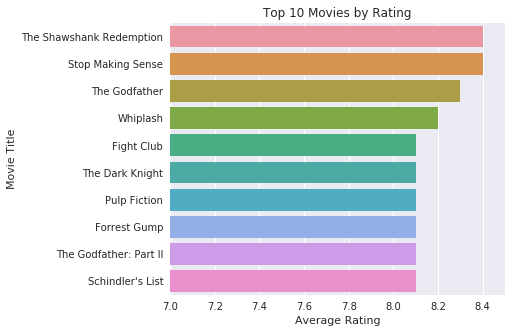

In [94]:
#Plotting and selecting Plot chart
sns.set(style="whitegrid");
sns.set(font_scale=1);
f, ax = plt.subplots(figsize=(6, 5));
ax = sns.barplot(x='vote_average', y='original_title', data=df_top10);

ax.set(xlim=(7,8.5), ylabel="Movie Title", xlabel="Average Rating");
plt.title('Top 10 Movies by Rating');

### Research Question 2: Movies with biggest and lowest budget.

> **Changing the datatype of Budget and Revenue and calculating Profit earned**

In [95]:
#Changing the datatype of 'budget' and 'revenue' from float to int for easy calculation
change_type=['budget', 'revenue']

#changing data type
df[change_type]=df[change_type].applymap(np.int64)

#PROFIT EARNED
#insert function with three parameters(index of the column, name of the column, value to be inserted
df.insert(3,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,id,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


### Research Question 2: Movies with most and least profit.

> **Printing data of the movies which had most and least profit**

In [96]:
import pprint

#defining the function calculate
def calculate(column):
    
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #concatination of data 
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
id,19995,46528
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> The above data shows that:
> 1. Avatar made the most profit and 2. The Warrior's Way made the least.

### Research Question 3: Movies with biggest and lowest budget.

> **Printing data of the movies with the biggest and lowest budget**

In [97]:
#calling the function
calculate('budget')

,2244,2618
id,46528,39964
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


> The above data shows that: (assuming the currency as USD)
> 1. The Warrior's Way was the biggest budget movie produced with USD 425000000	and 2. Lost and Found was the one with lowest budget of USD 1.

### Research Question 4: Movies with longest, shortest and average runtime.

> **Printing data of the movies which had the longest and shortest runtime**

In [98]:
#calling the function
calculate('runtime')

,2107,5162
id,43434,24914
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


> The above data shows that:
> 1. Carlos had the longest runtime of 338 minutes and 2. Kid's Story had the smallest runtime of 15 minutes.

> **Calculating the Average runtime of the movies**

In [99]:
#defining a function
def avg_fun(column):
    return df[column].mean()

#Calling a function
avg_fun('runtime')

109.22029060716139

> The above data shows that the Average runtime of the movie is 109.22 minutes.

> **Using .describe() to know the %wise distribution of runtime**

In [100]:
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Research Question 5: Total Profits earned by the movies in their respectable Year of release.

> **Graphical representation of Total Profits earned Vs Year of the release using Line Chart**

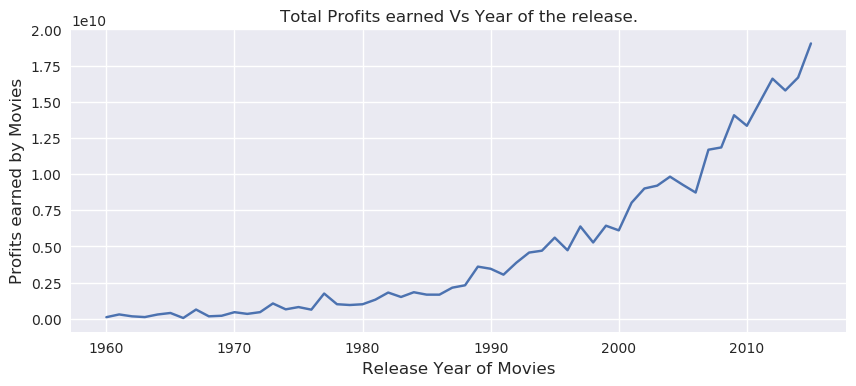

In [101]:
#To calculate the profits for every year, 'sum' is calculated of the particular year
profits_year = df.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(10,4), dpi = 100)

#labels on x-axis and y-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)

#title of the graph
plt.title('Total Profits earned Vs Year of the release.')

#plotting the graph
plt.plot(profits_year)

#displaying the graph
plt.show()

> **Year that made the highest profit**

In [102]:
#Year with the highest profit
profits_year.idxmax()

2015

In [103]:
#Year with the least profit
profits_year.idxmin()

1966

### Research Question 6: The most popular produced genres

> **Finding successful movies with respect to Genres**

In [104]:
from pandas import Series
import numpy as np

def data(column):
    
    #splitting the values by '|' and storing
    data = df_1['genres'].str.split('|').apply(Series, 1).stack()
    count = data.value_counts(ascending = False)
    
    return count

In [105]:
#variable to store the retured value
count = data('genres')

#printing top 5 values
count.head(10)

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
dtype: int64

> **Graphical representation of Movies count by Genres using Bar Chart**

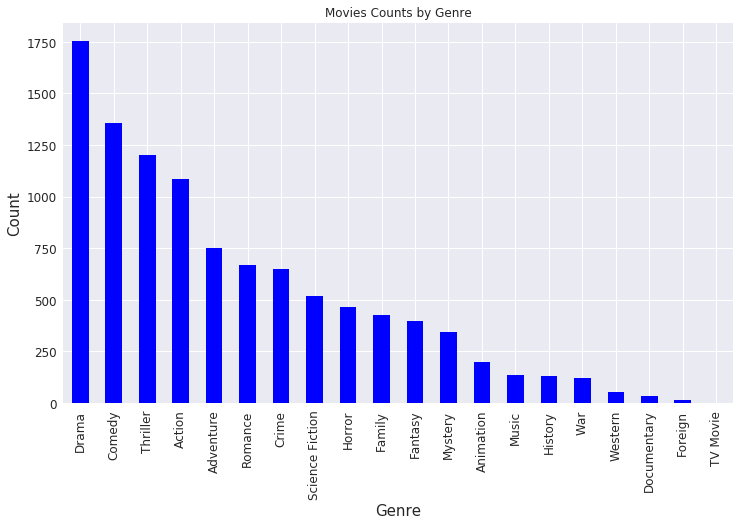

In [106]:
chart = count.plot.bar(color = '#0000FF', title = 'Movies Counts by Genre', fontsize = 12)
chart.figure.set_size_inches(12, 7)

plt.xlabel('Genre', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.show()

>From the above data, we can conclude that the most successful genre is Drama with the movie count of 1756, followed by Comedy and Thriller.

### Research Question 7: The no. of films produced over time.

> **Calculating the no. of movies released in that particular year**

In [107]:
#To calculate the no. of movies released, 'count' is calculated of the particular year
release_year_counts = df.groupby(['release_year']).count()['vote_count']
release_year_counts.head(10)

release_year
1960     5
1961    10
1962     7
1963     6
1964     7
1965     5
1966     5
1967    13
1968     9
1969     4
Name: vote_count, dtype: int64

In [108]:
#To find year with max. movie count
release_year_counts.idxmax()

2011

In [109]:
#To find year with least. movie count
release_year_counts.idxmin()

1969

> **Graphical representation of Movies count by Release Year**

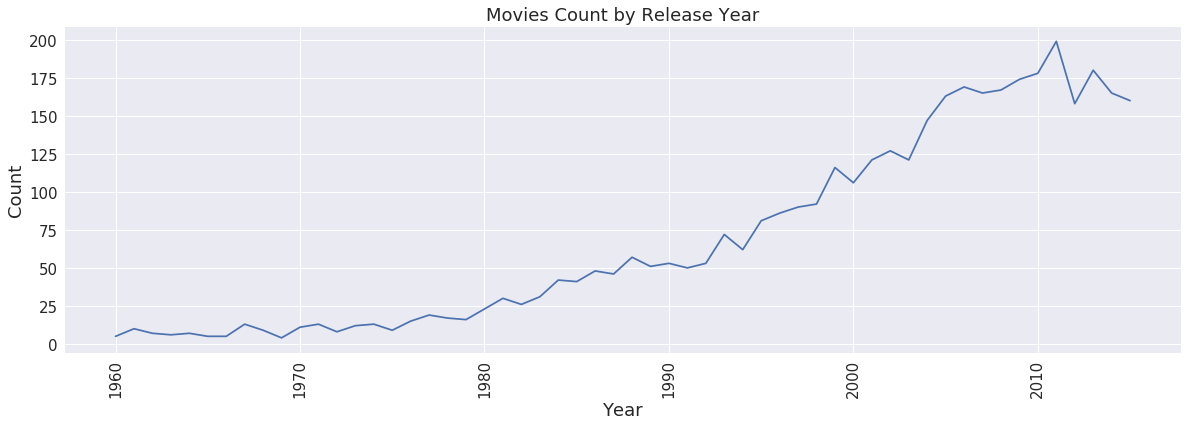

In [110]:
chart2_df = df.groupby('release_year').count()['vote_count']
sns.set_style("dark")
sns.set(font_scale=1.5);
chart2_df.plot(kind='line', figsize=(20,6), title = 'Movies Count by Release Year')

plt.xlabel('Year', fontsize = 18);
plt.ylabel('Count', fontsize = 18);
plt.xticks(rotation=90);

>From the above data, we can conclude that in Year 2011 had maximum movies released, and Year 1969 had the least movies released.

>The production of movies have drastically increased fro 1960 to 2011.

<a id='conclusions'></a>
## Conclusions
> **Top 10 Movies by Ratings are:** 
>1. The Shawshank Redemption
>2. Stop Making Sense 
>3. The Godfather
>4. Whiplash
>5. Fight Club
>6. The Dark Knight
>7. Pulp Fiction
>8. Forrest Gump
>9. The Godfather: Part ||
>10. Schindler's List

>*Avatar made the most profit in year 2009 and The Warrior's Way made the least profit in year 2010, although both the movies produced were of the same genres.*

>*The Warrior's Way was the highest budget movie and also the one with the least profits. This shows that the movie has made a very big loss.*

>**The average runtime of the movie is 109 minutes.**
>- 25% of the movies had the runtime of approx. 95 mins.
>- 50% of the movies had the runtime of approx. 106 mins
>- 75% of the movies had the runtime of approx. 119 mins.
>- Movie with the longest runtime is of 338 minutes

>*1966 has made the least profit, as only 5 films were released in the entire year, while 2005 made the most profit with 163 films released.*

>*1969 has the least movies released which is only 4 films.*

>**The most popular produced genres are:**
>- Drama              1756
>- Comedy             1358
>- Thriller           1204
>- Action             1085
>- Adventure           749
>- Romance             667
>- Crime               651
>- Science Fiction     519
>- Horror              463
>- Family              425
>- Fantasy             396
>- Mystery             344
>- Animation           201
>- Music               136
>- History             129
>- War                 119
>- Western              52
>- Documentary          35
>- Foreign              13
>- TV Movie              1

>*The production of movies have drastically increased over a period of time of 1960 to 2015. The significant increase in the production of movies can be observed from the year 1997 to 2009.*


## Limitations
>* The curreny for the Budget and Revenue has not be stated clearly in the dataset. So USD has been considered as the standard currency for calculations. The results may vary, if there is a change in the currency. 
>* The rows having 0's and Null values are removed for the analysis. Those rows could affect the overall analysis of the data.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0